In [1]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My Drive/Colab Notebooks/AN2DL/Homework 1

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/AN2DL/Homework 1


In [2]:
import numpy as np
import hashlib
import matplotlib.pyplot as plt

In [3]:
data = np.load('training_set.npz') # load the blood cells dataset into a variable called 'data'
print(data.files)

['images', 'labels']


In [4]:
# splitting between images and labels
X = data['images']
y = data['labels']

In [5]:
# Define a mapping of labels to their corresponding digit names
classes = {0:'Basophil', 1:'Eosinophil', 2:'Erythroblast', 3:'Immature granulocytes', 4:'Lymphocyte', 5:'Monocyte', 6:'Neutrophil', 7:'Platelet'} # 8 classes
# Save unique labels
unique_labels = list(classes.values())

In [6]:
# Dictionary to store image hashes and their indices
hash_dict = {}
duplicates = []

for idx, img in enumerate(X):
    # Convert the image to bytes to create a hash
    img_bytes = img.tobytes()
    img_hash = hashlib.md5(img_bytes).hexdigest()

    # Check if the hash exists in hash_dict
    if img_hash in hash_dict:
        # print(f"Duplicate found at index {idx}, duplicate of index {hash_dict[img_hash]}")
        duplicates.append(idx)  # Mark this index as a duplicate
    else:
        hash_dict[img_hash] = idx  # Store unique hash with its index

# Remove duplicates from X and y
X_unique = np.delete(X, duplicates, axis=0)
y_unique = np.delete(y, duplicates, axis=0)

# Save the deduplicated dataset if desired
# np.savez('deduplicated_training_set.npz', images=X_unique, labels=y_unique)

print(f"Removed {len(duplicates)} duplicates. New dataset has {len(X_unique)} images.")

Removed 1806 duplicates. New dataset has 11953 images.


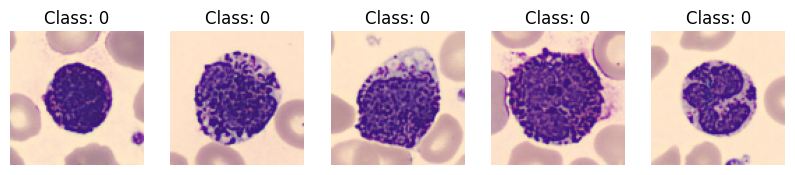

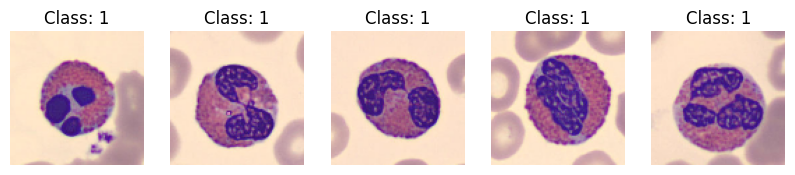

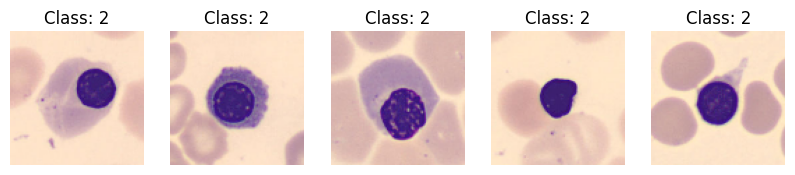

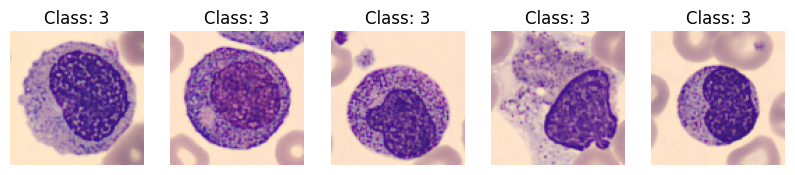

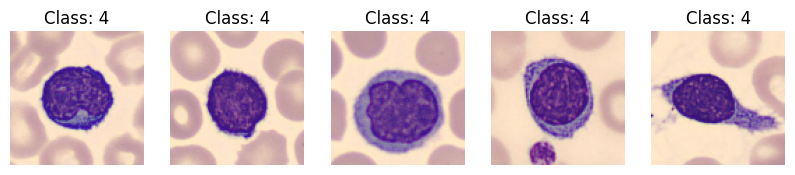

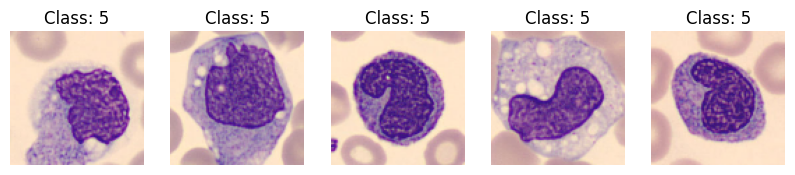

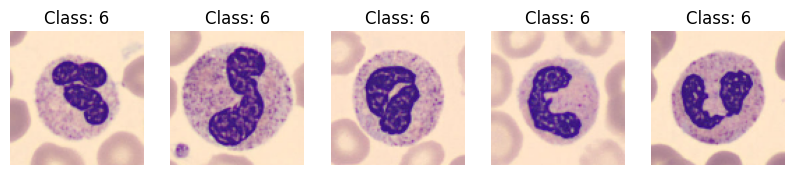

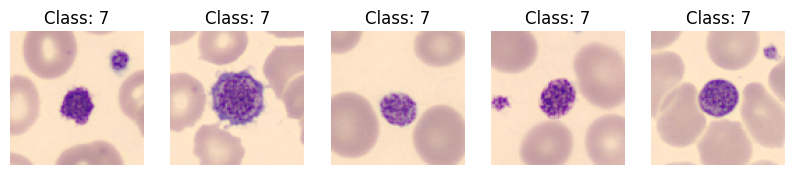

In [7]:
classes = np.unique(y_unique)

# Plot first 5 images for each class
for cls in classes:
    # Find indices where y == cls
    indices = [i for i in range(len(y_unique)) if y_unique[i] == cls][:5]
    images = [X_unique[i] for i in indices]

    # Create a figure for the current class
    plt.figure(figsize=(10, 5))
    for i, img in enumerate(images):
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap='gray')  # Assuming grayscale images; modify if color images
        plt.title(f"Class: {cls}")
        plt.axis('off')
    #plt.suptitle(f"First 5 Images of Class {cls}")
    plt.show()

In [8]:
# Plot first 5 images and their histograms for each class
for cls in classes:
    # Find indices where y == cls
    indices = [i for i in range(len(y_unique)) if y_unique[i] == cls][:5]
    images = [X_unique[i] for i in indices]

    # Create a figure for the current class
    plt.figure(figsize=(15, 10))

    # Visualize images
    for i, img in enumerate(images):
        plt.subplot(2, 5, i + 1)  # First row: images
        plt.imshow(img, cmap='gray')  # Assuming grayscale images; modify if color images
        plt.title(f"Class: {cls}")
        plt.axis('off')

    # Visualize histograms
    for i, img in enumerate(images):
        # Normalize the image
        normalized_img = np.array(img) / 255.0

        plt.subplot(2, 5, i + 6)  # Second row: histograms
        plt.hist(normalized_img.ravel(), bins=50, color='blue', alpha=0.7)
        plt.title(f"Histogram (Class: {cls})")
        plt.xlabel('Pixel Value (Normalized)')
        plt.ylabel('Frequency')

    plt.suptitle(f"Class {cls}: First 5 Images and Histograms")
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

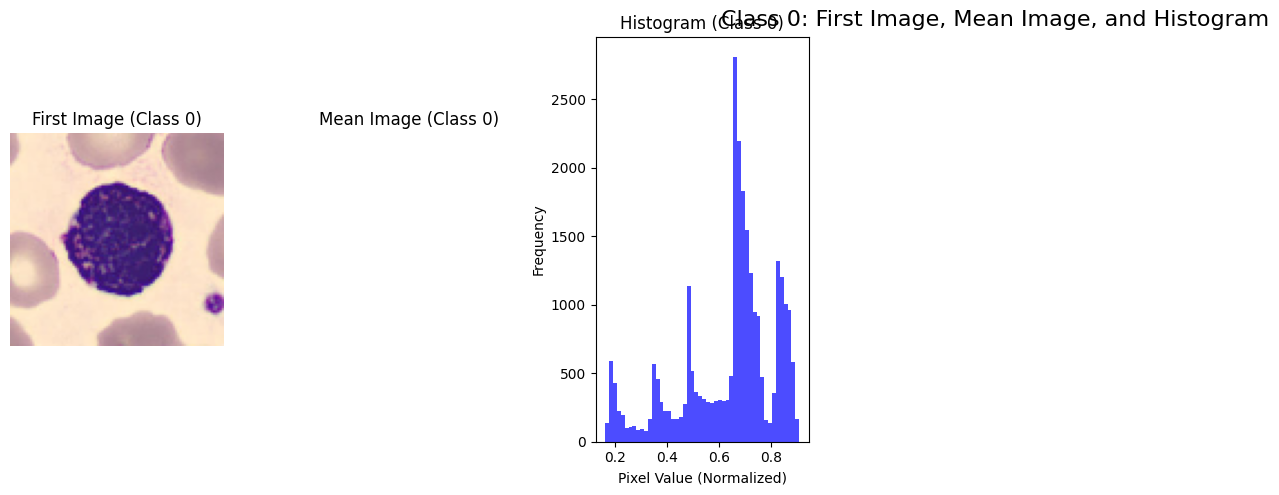

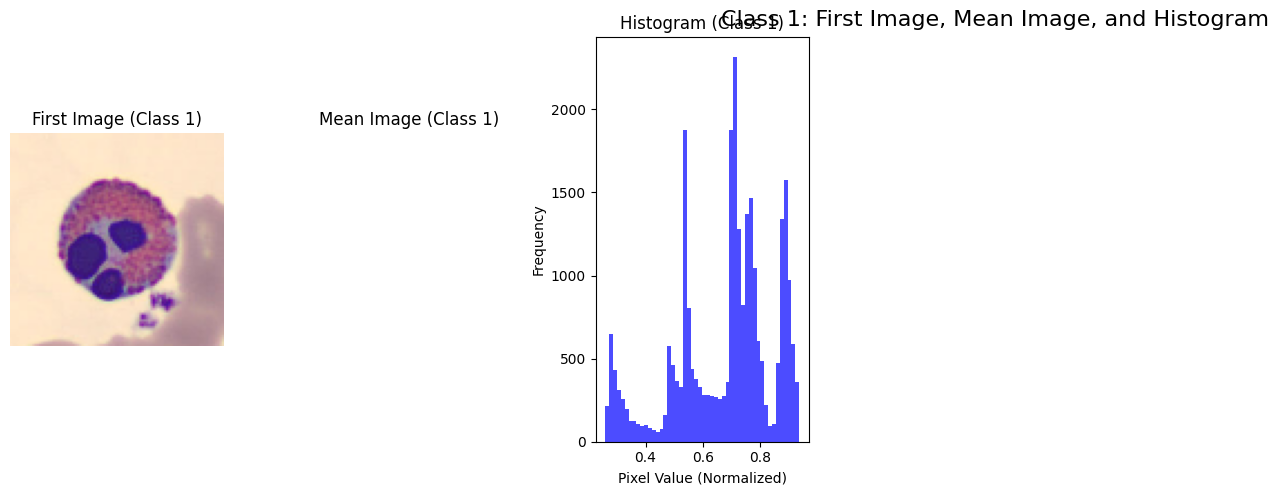

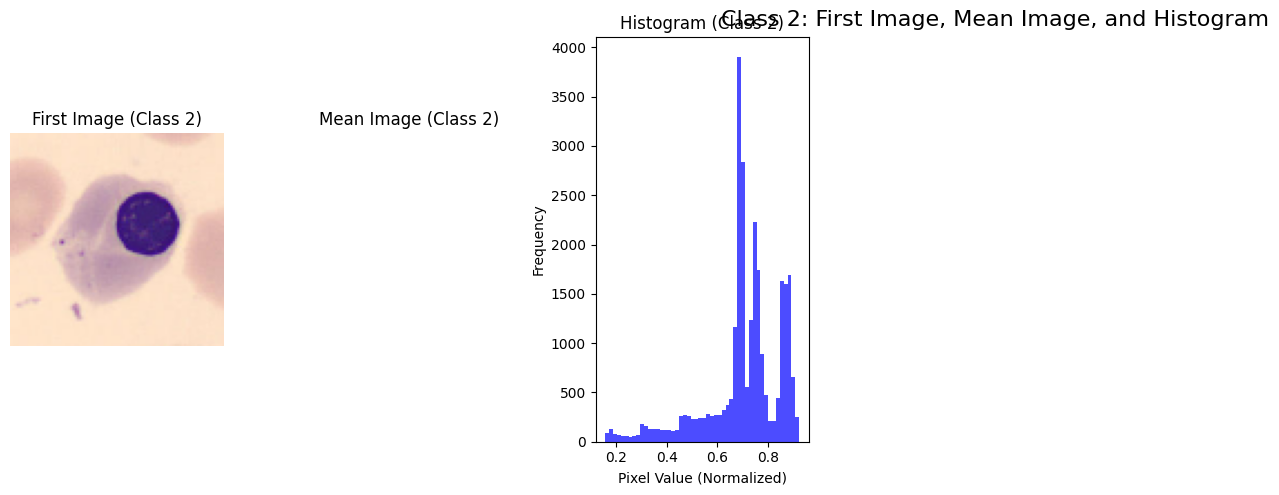

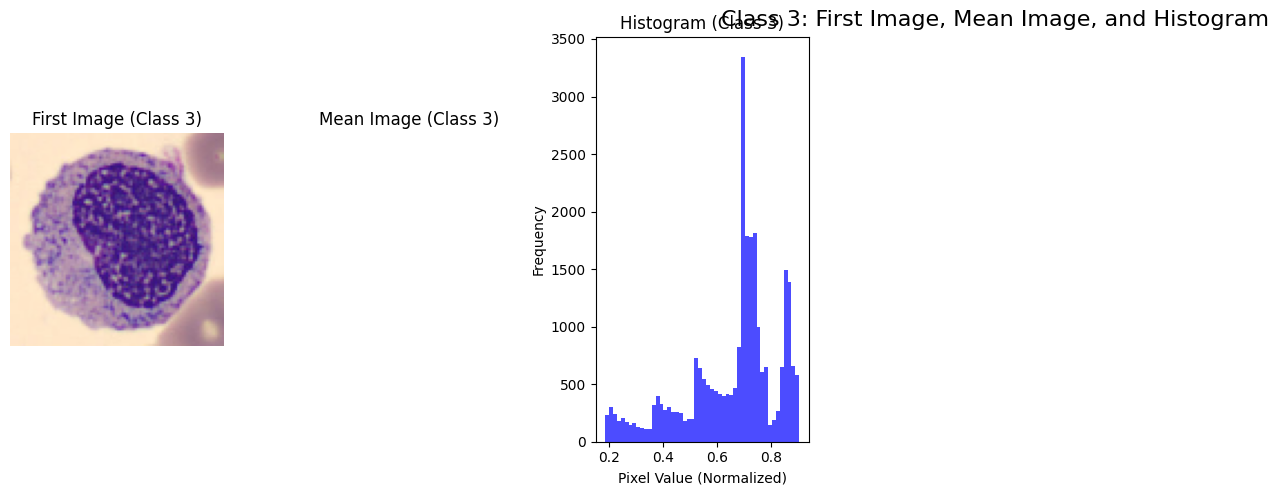

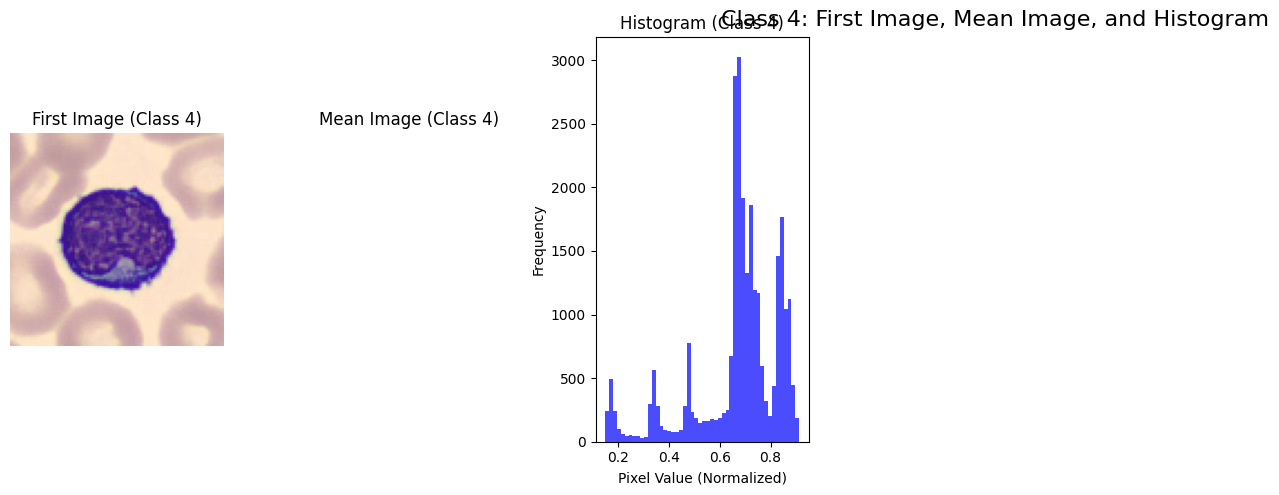

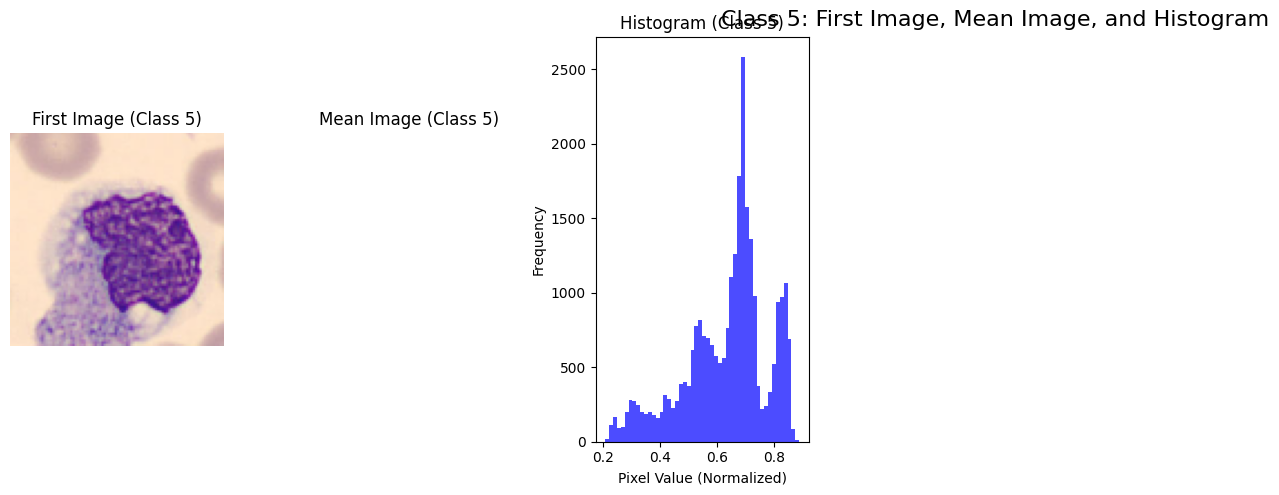

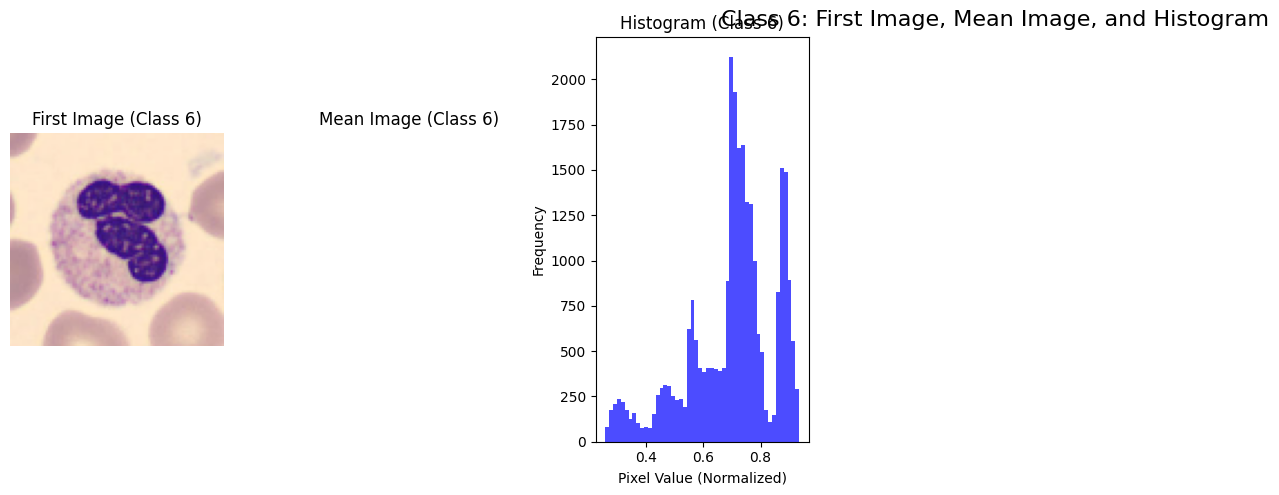

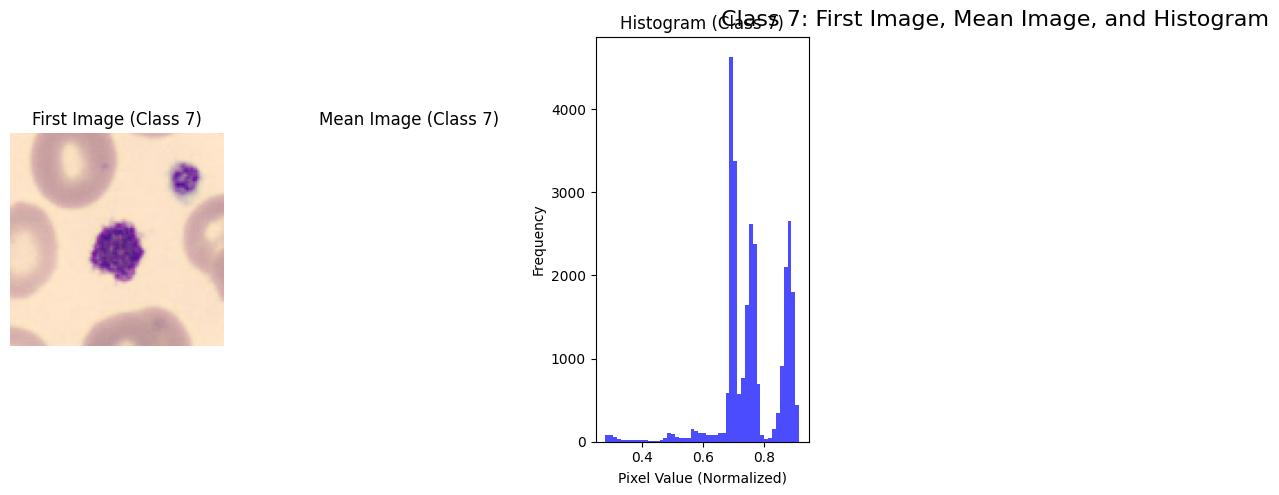

In [10]:
# Plot the first image, mean image, and its histogram for each class
for cls in classes:
    # Find indices where y == cls
    indices = [i for i in range(len(y)) if y[i] == cls]
    images = [X[i] for i in indices]

    # Compute the mean image for the class
    mean_image = np.mean(images, axis=0)

    # Normalize the mean image by 255
    normalized_mean_image = mean_image / 255.0

    # Create the figure with 1 row and 7 columns (1x7)
    plt.figure(figsize=(20, 5))

    # Plot the first image for the class
    plt.subplot(1, 7, 1)
    plt.imshow(images[0], cmap='gray')  # Assuming grayscale images; modify if color images
    plt.title(f"First Image (Class {cls})")
    plt.axis('off')

    # Plot the mean image for the class
    plt.subplot(1, 7, 2)
    plt.imshow(mean_image, cmap='gray')  # Assuming grayscale images; modify if color images
    plt.title(f"Mean Image (Class {cls})")
    plt.axis('off')

    # Plot the histogram of the mean image
    plt.subplot(1, 7, 3)
    plt.hist(normalized_mean_image.ravel(), bins=50, color='blue', alpha=0.7)
    plt.title(f"Histogram (Class {cls})")
    plt.xlabel('Pixel Value (Normalized)')
    plt.ylabel('Frequency')

    # Adjust layout to ensure that subplots are well spaced
    plt.tight_layout()
    plt.suptitle(f"Class {cls}: First Image, Mean Image, and Histogram", fontsize=16)
    plt.show()